# <u>Group Project: Kickstarter Campaign</u>

Kickstarter is a company that provides the space for independent artists, creative, innovators, and entrepreneurs to bring their unique projects to life. Kickstarter allows anyone to financially support the project through an online pledging system - this means; anyone can pledge a specific amount of money towards the funding goal of the project. Kickstarter projects (also called campaigns) are all-or-nothing -- meaning, if the funding goal isn't met 100% (or exceeded), the project campaign fails and no funding is provided. The stakes are high - but what is it about certain campaigns that make them succeed while others fail? 

You have joined the marketing team for Kickstarter and you are tasked with exploring the features of several campaigns over the past few years. You are responsible for looking at this dataset and pulling out key insights about the characteristics of Kickstarter campaigns that make them more likely to succeed or fail. The marketing team at Kickstarter has a limited amount of funds to devote to highlighting specific projects, and they want to highlight projects that have the best chance of succeeding (i.e. meeting the funding goal). Can you help them determine who that might be?

Complete the steps below to take a dataset from inception to insights, for the purpose of answering the following two questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

After you have combed through the data, your group will put together a presentation (including visualizations), that clearly answers the two questions above. The Kickstarter dataset is posted to Canvas. Complete the code in the notebook below to complete the project. <b> You are NOT restricted to the steps laid out in this notebook to complete your project, You can conduct additional analyses or create additional visualizations. This notebook is everything you need to cover, but feel free to expand on these steps! This includes completing regression analyses with the dataset.</b>

## <font color=red>Part 1: Domain Knowledge</font>

Before you begin looking at the data, you need to expand your knowledge of the subject matter. Start by visiting www.kickstarter.com and read all you can about the company. What is the objective of the company? How does it work? What does the project timeline look like? You should research the company until you feel comfortable speaking about the basics of Kickstarter projects. Use the space below (double-click the cell to activate) to write a brief paragraph about what you learned about Kickstarter. 

### <font color=red>Questions to Answer</font>
1. What is Kickstarter?
2. What is the purpose of Kickstarter?
3. Who are the "backers" of a Kickstarter campaign?
4. How is success determined for a project campaign?

****

### <font color=red>KICKSTARTER INFORMATION</font>

#### In a nutshell:
Kickstarter is an online funding platform designed as a connection between creativity and capital. Its purpose is to break free from a central focus on profit at all costs.  The "backers" are individuals or groups that pledge money if a project gets fully funded. Success is determined as a project meeting its funding goal within its timeline.


## <font color=darkorange>Part 2: Data Import and Cleaning</font>

Now that you are familiar with where the data is coming from, you are ready to start examining the data. The Kickstarter Dataset is a collection of project campaign information from 2016. Data includes information about the project name, length, country of origin, goal, and the amount of money raised, etc. If you open the Kickstarter Dataset in excel, the second tab provides descriptions of each of the columns/variables. Import the dataset into this notebook and follow the steps below to gather information about the data and to clean up the dataset. Use the space below (double-click the cell to activate) to write a brief paragraph describing the dataset and the steps you took while cleaning the data. 

### <font color=darkorange>Questions to Answer</font>
1. How many columns are in the dataset? How many rows?
2. What type of variables (continuous, categorical) make up this dataset?
3. Which variables have missing values? 
4. How did you handle the missing data in the dataset?
5. How many rows are in your dataset after handling missing data?
6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
7. What percentage of the each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.

***

### <font color=darkorange>DATASET INFORMATION AND CLEANING</font>

#### Answers below:
1. 281,856 rows and 14 columns
2. All types of variables - integer, decimal, date/time, and categorical
3. missing variables in the following categories: name, usd pledged
4. a project without a name is still a project, so just changed the name to unknown; a project without pledges, though, is neither a success nor a failure and therefore useless to include in dataset (dropped)
5. 281,646 rows after handling missing data
6. I found no odd or inappropriate values in any of the columns, including usd pledged, which has no negative values
7. done

In [238]:
## import libraries and import Kickstarter dataset
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

df = pd.read_excel("Kickstarter_Dataset.xlsx")

## this is a large dataset, we want to see all rows 
# pd.set_option('display.max_rows', None)


## this is a very large dataset, be patient, it may take a while to import!!



In [239]:
## determine dataset shape (number of rows and columns)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [240]:
## determine dataset features (info) and data types



In [241]:
## determine which variables have missing data 
df.isnull().sum()


ID                 0
name              35
main_category      0
category           0
country            0
currency           0
launched           0
deadline           0
length_days        0
goal               0
pledged            0
usd pledged      210
backers            0
state              0
dtype: int64

In [242]:
## handling missing data

## fill all the missing values in "name" with "Unknown Project Name"
df["name"].replace(np.nan, "Unknown Project Name", inplace = True)
#checking to see that it was done correctly
df.loc[df["name"]=="Unknown Project Name"]

## drop all the rows where "usd pledged" is missing
df.dropna(subset=["usd pledged"], inplace = True)

# checking for missing values
df.isnull().sum()

ID               0
name             0
main_category    0
category         0
country          0
currency         0
launched         0
deadline         0
length_days      0
goal             0
pledged          0
usd pledged      0
backers          0
state            0
dtype: int64

In [243]:
## inappropriate values in categorical variables; check value counts
df.info()
df["main_category"].value_counts()
df["category"].value_counts()
df["country"].value_counts()
df["currency"].value_counts()
df["state"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281646 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281646 non-null  int64         
 1   name           281646 non-null  object        
 2   main_category  281646 non-null  object        
 3   category       281646 non-null  object        
 4   country        281646 non-null  object        
 5   currency       281646 non-null  object        
 6   launched       281646 non-null  datetime64[ns]
 7   deadline       281646 non-null  datetime64[ns]
 8   length_days    281646 non-null  int64         
 9   goal           281646 non-null  float64       
 10  pledged        281646 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281646 non-null  int64         
 13  state          281646 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

failed        168503
successful    113143
Name: state, dtype: int64

In [244]:
df.loc[df["usd pledged"]<0].index

Int64Index([], dtype='int64')

In [245]:
df3 = df.copy()

In [246]:
## drop unneeded columns (project ID, name, pledged, launched, deadline)
# you will use usd pledged from now on

df3.drop(columns = ["ID", "name", "launched", "deadline", "pledged"], inplace = True)

df3.head()


,main_category,category,country,currency,length_days,goal,usd pledged,backers,state
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed
2,Technology,3D Printing,AT,EUR,30,15000.0,4152.402045,46,failed
3,Technology,3D Printing,AT,EUR,30,20000.0,19.435528,6,failed
4,Technology,3D Printing,AT,EUR,40,20000.0,2908.076574,29,failed


In [247]:
# create a new column
## percentage of project that was funded - how close were they to reaching the goal?

df["pct_funded"] = (df["usd pledged"]/df["goal"])*100

In [248]:
df.describe()

,ID,length_days,goal,pledged,usd pledged,backers,pct_funded
count,2.816460e+05,281646.000000,2.816460e+05,2.816460e+05,2.816460e+05,281646.000000,2.816460e+05
mean,1.074977e+09,33.976520,4.181597e+04,9.441571e+03,8.575848e+03,111.934801,2.762000e+02
std,6.194735e+08,12.894187,1.043830e+06,9.406700e+04,8.916948e+04,996.631624,1.826263e+04
min,5.971000e+03,1.000000,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,5.373189e+08,30.000000,2.000000e+03,5.000000e+01,4.000000e+01,2.000000,6.000000e-01
50%,1.075998e+09,30.000000,5.000000e+03,7.710000e+02,6.910000e+02,15.000000,1.661484e+01
75%,1.611435e+09,36.000000,1.500000e+04,4.448875e+03,4.109040e+03,62.000000,1.080828e+02
max,2.147476e+09,92.000000,1.000000e+08,2.033899e+07,2.033899e+07,219382.000000,5.526657e+06


## <font color=#EAC117>Part 3: Exploratory Analysis</font>

With a clean dataset, you are now ready to start exploring the variables in your dataset. Don't worry about how your variables relate to each other - we will cover that in the next section. For now, it's more important that you get a clear sense of the variable characteristics on their own. Follow the steps below to explore all of the variables within your dataset and preform descriptive statistics. In addition to the descriptive statistics, you are tasked with creating a visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to explore the data. 

### <font color=#EAC117>Questions to Answer</font>
1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length? 
2.	What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?
3.	What is the most common (mode) length for campaign projects?
4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category? 
5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category? 
6.	Which country has started the most Kickstarter campaigns?
7.	How many projects have failed? How many projects have succeeded?

### <font color=#EAC117>Visualizations to Create</font> 
* Number of Projects by Main Category
* Number of projects by State (outcome)
* Number of projects from each country
* Number of successful projects and failed projects by Main Category

***

### <font color=#EAC117>EXPLORATORY DATA ANALYSIS</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [249]:
df3 = df.copy()

In [250]:
df3["avg_pledge_per_backer"] = (df3["usd pledged"]/df3["backers"])
df3.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state,pct_funded,avg_pledge_per_backer
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed,29.016752,86.608696
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed,2.082379,50.380130
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed,27.682680,90.269610
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed,0.097178,3.239255
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed,14.540383,100.278503


In [251]:
# removing pct_funded outliers

df3["zscore_pct_funded"] = np.abs(stats.zscore(df3["pct_funded"]))

df3 = df3[df3["zscore_pct_funded"]<=3]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281533 entries, 0 to 281855
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     281533 non-null  int64         
 1   name                   281533 non-null  object        
 2   main_category          281533 non-null  object        
 3   category               281533 non-null  object        
 4   country                281533 non-null  object        
 5   currency               281533 non-null  object        
 6   launched               281533 non-null  datetime64[ns]
 7   deadline               281533 non-null  datetime64[ns]
 8   length_days            281533 non-null  int64         
 9   goal                   281533 non-null  float64       
 10  pledged                281533 non-null  float64       
 11  usd pledged            281533 non-null  float64       
 12  backers                281533 non-null  int6

In [252]:
#removing usd_pledged outliers

df3["zscore_usd_pledged"] = np.abs(stats.zscore(df3["usd pledged"]))

usd_pledged_outlier = df3.loc[df3["zscore_usd_pledged"]>3]

df3 = df3[df3['zscore_usd_pledged']<=3]

df3.describe()

,ID,length_days,goal,pledged,usd pledged,backers,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged
count,2.805570e+05,280557.000000,2.805570e+05,2.805570e+05,280557.000000,280557.000000,280557.000000,2.472030e+05,2.805570e+05,280557.000000
mean,1.075031e+09,33.972145,4.135771e+04,6.570999e+03,5763.580987,86.007239,91.448293,inf,1.348263e-02,0.108076
std,6.195366e+08,12.901238,1.044857e+06,3.060791e+04,17663.577599,442.842704,573.449584,NaN,3.010870e-02,0.173054
min,5.971000e+03,1.000000,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.450294e-09,0.000001
25%,5.373183e+08,30.000000,2.000000e+03,4.800000e+01,38.116275,2.000000,0.580000,2.375000e+01,9.345478e-03,0.071771
50%,1.076008e+09,30.000000,5.000000e+03,7.590000e+02,680.000000,15.000000,16.280000,4.636111e+01,1.437090e-02,0.093679
75%,1.611662e+09,36.000000,1.500000e+04,4.349000e+03,4049.000000,61.000000,107.780000,8.073333e+01,1.510185e-02,0.097422
max,2.147472e+09,92.000000,1.000000e+08,6.465690e+06,271154.010000,154926.000000,54575.666667,inf,2.973261e+00,2.996524


In [253]:
#removing length_days outliers

df3["zscore_length_days"] = np.abs(stats.zscore(df3["length_days"]))

df3 = df3[df3['zscore_usd_pledged']<=3]

df3.describe()

,ID,length_days,goal,pledged,usd pledged,backers,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days
count,2.805570e+05,280557.000000,2.805570e+05,2.805570e+05,280557.000000,280557.000000,280557.000000,2.472030e+05,2.805570e+05,280557.000000,280557.000000
mean,1.075031e+09,33.972145,4.135771e+04,6.570999e+03,5763.580987,86.007239,91.448293,inf,1.348263e-02,0.108076,0.713186
std,6.195366e+08,12.901238,1.044857e+06,3.060791e+04,17663.577599,442.842704,573.449584,NaN,3.010870e-02,0.173054,0.700976
min,5.971000e+03,1.000000,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.450294e-09,0.000001,0.002159
25%,5.373183e+08,30.000000,2.000000e+03,4.800000e+01,38.116275,2.000000,0.580000,2.375000e+01,9.345478e-03,0.071771,0.307889
50%,1.076008e+09,30.000000,5.000000e+03,7.590000e+02,680.000000,15.000000,16.280000,4.636111e+01,1.437090e-02,0.093679,0.307889
75%,1.611662e+09,36.000000,1.500000e+04,4.349000e+03,4049.000000,61.000000,107.780000,8.073333e+01,1.510185e-02,0.097422,0.927986
max,2.147472e+09,92.000000,1.000000e+08,6.465690e+06,271154.010000,154926.000000,54575.666667,inf,2.973261e+00,2.996524,4.497860


In [254]:
#removing goal outliers

df3["zscore_goal"] = np.abs(stats.zscore(df3["goal"]))

df3 = df3[df3['zscore_goal']<=3]

df3.describe()

,ID,length_days,goal,pledged,usd pledged,backers,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal
count,2.802770e+05,280277.000000,2.802770e+05,2.802770e+05,280277.000000,280277.000000,280277.000000,2.470180e+05,2.802770e+05,280277.000000,280277.000000,280277.000000
mean,1.075027e+09,33.961720,2.186273e+04,6.574382e+03,5767.032906,86.083467,91.539607,inf,1.348100e-02,0.108079,0.712645,0.039391
std,6.195418e+08,12.892671,9.571741e+04,3.061894e+04,17668.500012,443.053908,573.728674,NaN,3.012369e-02,0.173111,0.700579,0.084785
min,5.971000e+03,1.000000,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.450294e-09,0.000001,0.002159,0.000103
25%,5.372403e+08,30.000000,2.000000e+03,4.900000e+01,39.000000,2.000000,0.594118,2.379281e+01,9.343930e-03,0.071737,0.307889,0.029533
50%,1.076007e+09,30.000000,5.000000e+03,7.600000e+02,681.763433,15.000000,16.373333,4.636584e+01,1.436707e-02,0.093656,0.307889,0.034797
75%,1.611660e+09,36.000000,1.500000e+04,4.353000e+03,4051.900000,61.000000,107.810000,8.073333e+01,1.510126e-02,0.097422,0.927986,0.038147
max,2.147472e+09,92.000000,3.141592e+06,6.465690e+06,271154.010000,154926.000000,54575.666667,inf,2.973261e+00,2.996524,4.497860,2.967144


In [255]:
#removing backers outliers

df3["zscore_backers"] = np.abs(stats.zscore(df3["backers"]))

df3 = df3[df3['zscore_backers']<=3]

df3.describe()

,ID,length_days,goal,pledged,usd pledged,backers,pct_funded,avg_pledge_per_backer,zscore_pct_funded,zscore_usd_pledged,zscore_length_days,zscore_goal,zscore_backers
count,2.780020e+05,278002.000000,2.780020e+05,2.780020e+05,278002.000000,278002.000000,278002.000000,244743.0000,2.780020e+05,278002.000000,278002.000000,278002.000000,278002.000000
mean,1.075023e+09,33.967123,2.164235e+04,5.371161e+03,4901.203939,63.708790,86.397848,inf,1.334135e-02,0.099309,0.714220,0.039405,0.200879
std,6.196187e+08,12.919110,9.573754e+04,1.700890e+04,13655.332619,143.779266,560.177733,NaN,2.951076e-02,0.127053,0.701901,0.084846,0.259828
min,5.971000e+03,1.000000,1.500000e-01,0.000000e+00,0.000000,0.000000,0.000000,0.0000,2.450294e-09,0.000001,0.002159,0.000103,0.000188
25%,5.371967e+08,30.000000,2.000000e+03,4.500000e+01,36.000000,2.000000,0.560000,23.7500,9.352447e-03,0.071440,0.307889,0.030012,0.122070
50%,1.076131e+09,30.000000,5.000000e+03,7.350000e+02,659.000000,14.000000,15.726491,46.4375,1.437442e-02,0.093506,0.307889,0.034797,0.178497
75%,1.611740e+09,36.000000,1.500000e+04,4.169000e+03,3884.722704,59.000000,107.211650,81.0000,1.510081e-02,0.097392,0.927986,0.038147,0.192039
max,2.147472e+09,92.000000,3.141592e+06,1.331937e+06,268654.025500,1415.000000,54575.666667,inf,2.973261e+00,2.967998,4.497860,2.967144,2.999452


In [256]:
#finding mode of campaign lengths
df3["length_days"].mode()

0    30
Name: length_days, dtype: int64

In [257]:
## calculate the range for all numeric variables
days_range = df3["length_days"].max() - df3["length_days"].min()
goal_range = df3["goal"].max() - df3["goal"].min()
pledged_range = df3["usd pledged"].max() - df3["usd pledged"].min()
backers_range = df3["backers"].max() - df3["backers"].min()
pct_funded_range = df3["pct_funded"].max() - df3["pct_funded"].min()

print("Ranges")
print("--"*18)
print(f"Project length:\t\t{days_range} days")
print(f"Goal Amount:\t\t${int(goal_range)}")
print(f"USD Pledged Amount:\t${int(pledged_range)}")
print(f"Number of Backers:\t{int(backers_range)}")
print(f"Percent Funded:\t\t{int(pct_funded_range)*100}%")

Ranges
------------------------------------
Project length:		91 days
Goal Amount:		$3141591
USD Pledged Amount:	$268654
Number of Backers:	1415
Percent Funded:		5457500%


In [258]:
## frequency of categorical variable groups
df3["main_category"].value_counts()


Film & Video    50747
Music           40763
Publishing      30150
Art             21751
Games           21293
Technology      20730
Design          19244
Food            18827
Fashion         15728
Theater          9323
Photography      8656
Comics           7774
Crafts           6303
Journalism       3519
Dance            3194
Name: main_category, dtype: int64

In [259]:
df3["category"].value_counts()

Product Design        13867
Documentary           13271
Shorts                10778
Music                 10703
Food                   9504
Tabletop Games         8234
Film & Video           7766
Video Games            7400
Fiction                7269
Fashion                6945
Nonfiction             6567
Theater                6470
Art                    6222
Rock                   5839
Children's Books       5135
Indie Rock             5035
Photography            5035
Webseries              4745
Apparel                4629
Technology             4572
Narrative Film         4369
Comics                 4176
Publishing             4109
Apps                   3970
Country & Folk         3816
Web                    3461
Crafts                 3406
Hip-Hop                3056
Design                 2826
Pop                    2760
Painting               2640
Public Art             2616
Hardware               2501
Classical Music        2213
Mixed Media            2183
Games               

In [260]:
df3["country"].value_counts()

US    226736
GB     23655
CA      9790
AU      5141
DE      2095
NL      1859
FR      1533
IT      1384
ES      1078
SE      1043
NZ       989
DK       663
IE       472
NO       426
CH       380
BE       327
AT       279
SG        69
HK        46
LU        33
MX         4
Name: country, dtype: int64

In [261]:
df3["currency"].value_counts()

USD    226736
GBP     23655
CAD      9790
EUR      9060
AUD      5141
SEK      1043
NZD       989
DKK       663
NOK       426
CHF       380
SGD        69
HKD        46
MXN         4
Name: currency, dtype: int64

In [262]:
df3["state"].value_counts()

failed        168170
successful    109832
Name: state, dtype: int64

<AxesSubplot:title={'center':'Number of Projects by Main Category'}, xlabel='main_category', ylabel='Count'>

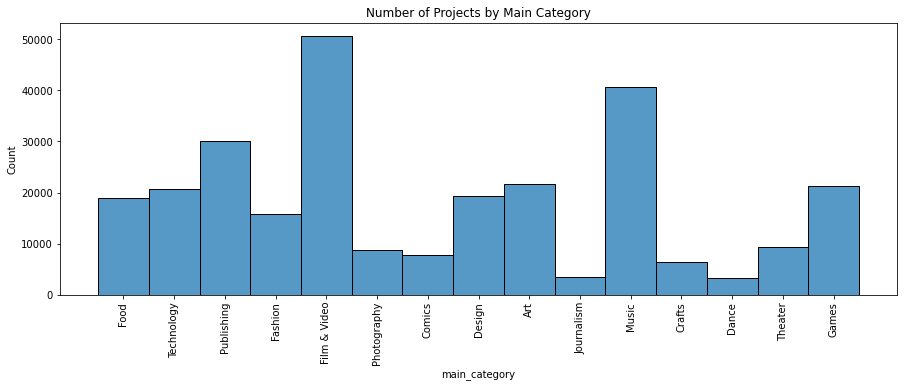

In [263]:
# visualization: number of projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Main Category")
sns.histplot(x = df3["main_category"], kde = False)


<AxesSubplot:title={'center':'Number of Projects by Failure/Success'}, xlabel='state', ylabel='Count'>

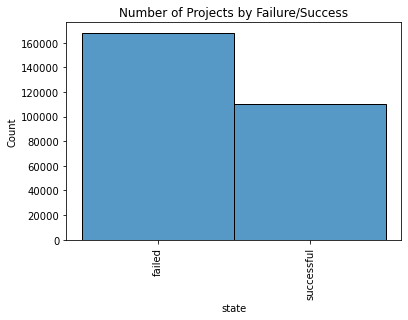

In [264]:
# visualization: number of projects by state
plt.title("Number of Projects by Failure/Success")
plt.xticks(rotation = 90)
sns.histplot(x = df3["state"], kde = False)

<AxesSubplot:title={'center':'Number of Projects by Country'}, xlabel='country', ylabel='Count'>

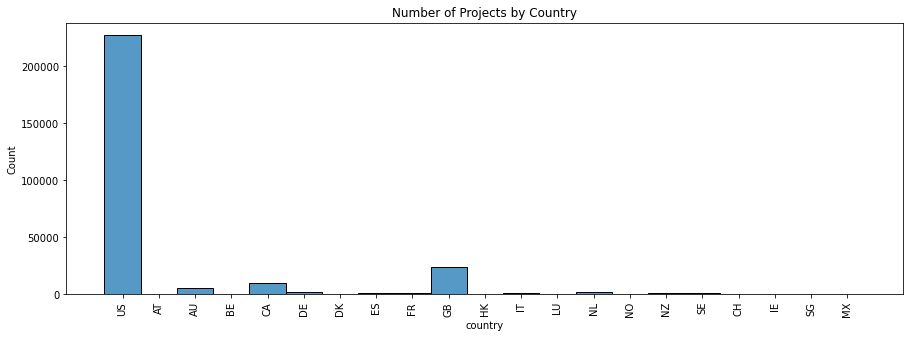

In [265]:
# visualization: number of projects by country

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Country")
sns.histplot(x = df3["country"], kde = False)

<AxesSubplot:title={'center':'Number of Failed/Successful Projects by Main Category'}, xlabel='main_category', ylabel='count'>

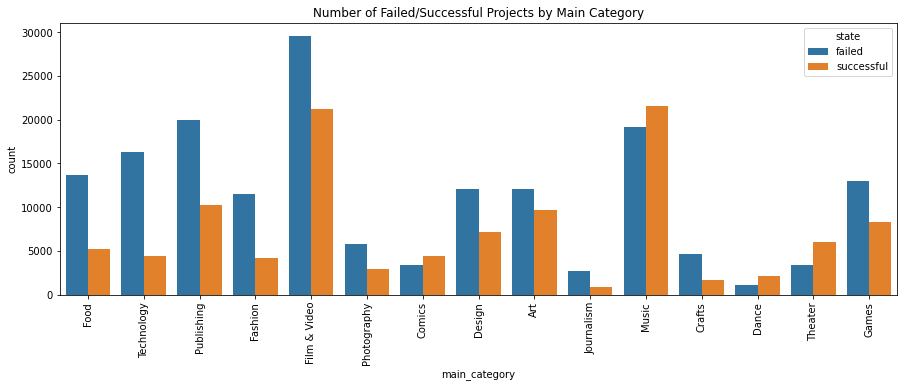

In [266]:
# visualization: number of failed/successful projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Failed/Successful Projects by Main Category")
sns.countplot(x = df3["main_category"], hue = df3["state"])

## <font color=#6AA121>Part 4: Variable Relationships</font>

It's time to explore the relationships between variables and answer some of the critical questions for the project. Your dependent/outcome variable is <b>STATE</b> - this is the variable that captures if the project was successful or not. In addition to exploring the relationships between your other independent variables, you want to pay close attention to the relationship between your independent variables and state. Follow the steps below to explore the relationships between your variables. In addition, you are tasked with creating visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to determine variable relationships. 

### <font color=#6AA121>Questions to Answer</font>
1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?
2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable? 
3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?
4.	What percentage of projects succeed and fail across each of the main categories?
5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?
6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?
7.  What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?


### <font color=#6AA121>Visualizations to Create</font> 
* Average Pledge by Main Category
* Average Num Backers by Main Category
* Average Pledge by State
* Average Num Backers by State
* Average Funding Goal by Main Category
* Average Funding Goal by State
* Average Percentage of Funding Collected by Main Category

***

### <font color=#6AA121>RELATIONSHIPS BETWEEN VARIABLES</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [268]:
df3.drop(columns = "ID", inplace = True)

In [270]:
df3.drop(columns = ["zscore_pct_funded", "zscore_usd_pledged", "zscore_length_days", "zscore_goal", "zscore_backers"], inplace = True)
df3.corr()



,length_days,goal,pledged,usd pledged,backers,pct_funded,avg_pledge_per_backer
length_days,1.000000,0.068308,0.006053,0.009738,-0.021812,-0.032874,0.026839
goal,0.068308,1.000000,0.071517,0.053599,0.008955,-0.025727,0.088921
pledged,0.006053,0.071517,1.000000,0.826178,0.648236,0.077073,0.205722
usd pledged,0.009738,0.053599,0.826178,1.000000,0.722687,0.102447,0.262241
backers,-0.021812,0.008955,0.648236,0.722687,1.000000,0.138825,0.026624
pct_funded,-0.032874,-0.025727,0.077073,0.102447,0.138825,1.000000,0.011933
avg_pledge_per_backer,0.026839,0.088921,0.205722,0.262241,0.026624,0.011933,1.000000


In [271]:
df3.drop(columns = "pledged", inplace = True)
df3.corr()

# strongest correlation between amount pledged and number of backers

,length_days,goal,usd pledged,backers,pct_funded,avg_pledge_per_backer
length_days,1.000000,0.068308,0.009738,-0.021812,-0.032874,0.026839
goal,0.068308,1.000000,0.053599,0.008955,-0.025727,0.088921
usd pledged,0.009738,0.053599,1.000000,0.722687,0.102447,0.262241
backers,-0.021812,0.008955,0.722687,1.000000,0.138825,0.026624
pct_funded,-0.032874,-0.025727,0.102447,0.138825,1.000000,0.011933
avg_pledge_per_backer,0.026839,0.088921,0.262241,0.026624,0.011933,1.000000


In [272]:
## average pledge across categoricial variables (groupby)
df3["usd pledged"].groupby(df3["main_category"]).mean()

main_category
Art             2726.201671
Comics          4825.803116
Crafts          1428.082108
Dance           3379.413620
Design          9753.890640
Fashion         4180.100817
Film & Video    5270.250829
Food            4301.859832
Games           7439.987923
Journalism      2469.035142
Music           3665.087983
Photography     2929.896242
Publishing      2761.474299
Technology      8814.927090
Theater         3881.343176
Name: usd pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Main Category'}, xlabel='main_category', ylabel='usd pledged'>

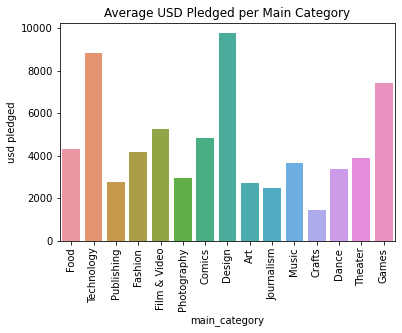

In [273]:
# visualizing Average USD Pledged per Main Category
plt.title("Average USD Pledged per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["usd pledged"], ci = None)


In [274]:
df3["usd pledged"].groupby(df3["category"]).mean()

category
3D Printing           21713.548986
Academic               1856.178751
Accessories            5537.666924
Action                 2895.818539
Animals                2382.214298
Animation              4919.938096
Anthologies            6346.914786
Apparel                3714.353763
Apps                   1412.339561
Architecture           4473.243686
Art                    2930.421962
Art Books              7013.514564
Audio                  3261.548250
Bacon                  1598.635068
Blues                  3901.857626
Calendars              3274.572065
Camera Equipment      25525.435672
Candles                 605.679972
Ceramics               4889.230446
Children's Books       2796.575238
Childrenswear          2840.888966
Chiptune               5501.673158
Civic Design           7286.745961
Classical Music        4375.222830
Comedy                 4440.023970
Comic Books            2878.686856
Comics                 4675.720617
Community Gardens      1781.858501
Conceptual 

In [275]:
df3["usd pledged"].groupby(df3["country"]).mean()

country
AT    4668.648763
AU    3614.648662
BE    2544.651717
CA    3771.083003
CH    6019.428984
DE    4216.698402
DK    4240.095788
ES    3077.358297
FR    6116.728143
GB    4541.192640
HK    2979.728995
IE    4791.387437
IT    2884.938378
LU    4329.165422
MX       8.136906
NL    4524.037385
NO    2556.932683
NZ    3814.805486
SE    3762.922443
SG    2649.047928
US    5058.504993
Name: usd pledged, dtype: float64

In [276]:
df3["usd pledged"].groupby(df3["currency"]).mean()

currency
AUD    3614.648662
CAD    3771.083003
CHF    6019.428984
DKK    4240.095788
EUR    4246.171225
GBP    4541.192640
HKD    2979.728995
MXN       8.136906
NOK    2556.932683
NZD    3814.805486
SEK    3762.922443
SGD    2649.047928
USD    5058.504993
Name: usd pledged, dtype: float64

In [277]:
df3["usd pledged"].groupby(df3["state"]).mean()

state
failed         1216.878654
successful    10542.483195
Name: usd pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Success/Fail State'}, xlabel='state', ylabel='usd pledged'>

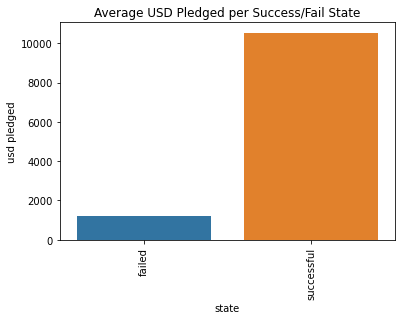

In [278]:
# visualizing Average USD Pledged per State
plt.title("Average USD Pledged per Success/Fail State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["usd pledged"], ci = None)

In [279]:
## average number of backers across categorical variables (groupby)
df3["backers"].groupby(df3["main_category"]).mean()

main_category
Art              38.800515
Comics          107.194880
Crafts           26.464065
Dance            44.010645
Design          117.648358
Fashion          46.429616
Film & Video     54.249611
Food             49.053275
Games           141.683276
Journalism       37.147769
Music            52.165199
Photography      38.118068
Publishing       47.757778
Technology       75.555572
Theater          47.796310
Name: backers, dtype: float64

In [55]:
df3["backers"].groupby(df3["category"]).mean()

category
3D Printing    273.092308
Academic        30.544068
Accessories     99.114499
Action          59.240404
Animals         34.532663
                  ...    
Woodworking     22.099762
Workshops       21.630252
World Music     58.424650
Young Adult     23.413732
Zines           53.453488
Name: backers, Length: 158, dtype: float64

In [280]:
df3["backers"].groupby(df3["country"]).mean()

country
AT     45.921147
AU     52.107567
BE     43.773700
CA     53.952094
CH     45.421053
DE     55.189976
DK     58.638009
ES     52.750464
FR     68.278539
GB     56.877743
HK     70.065217
IE     56.593220
IT     35.502168
LU     36.969697
MX      9.250000
NL     47.143088
NO     37.032864
NZ     59.302326
SE     59.917546
SG    114.391304
US     65.699540
Name: backers, dtype: float64

In [281]:
df3["backers"].groupby(df3["currency"]).mean()

currency
AUD     52.107567
CAD     53.952094
CHF     45.421053
DKK     58.638009
EUR     51.765011
GBP     56.877743
HKD     70.065217
MXN      9.250000
NOK     37.032864
NZD     59.302326
SEK     59.917546
SGD    114.391304
USD     65.699540
Name: backers, dtype: float64

In [282]:
df3["backers"].groupby(df3["state"]).mean()

state
failed         15.873337
successful    136.952364
Name: backers, dtype: float64

<AxesSubplot:title={'center':'Average Number Backers per State'}, xlabel='state', ylabel='backers'>

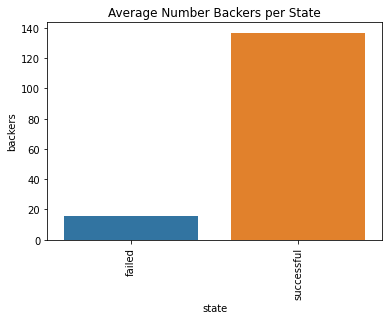

In [283]:
# visualizing Average Number Backers per State
plt.title("Average Number Backers per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["backers"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal per Main Category'}, xlabel='main_category', ylabel='goal'>

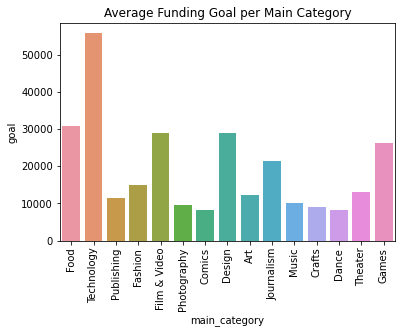

In [284]:
# visualizing Average Funding Goal per Main Category
plt.title("Average Funding Goal per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["goal"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal per State'}, xlabel='state', ylabel='goal'>

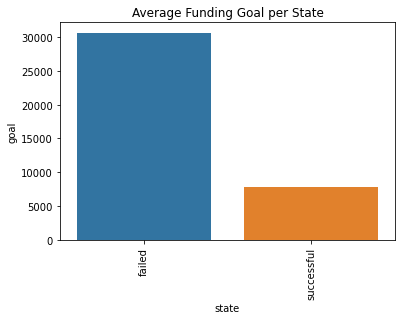

In [285]:
# visualizing Average Funding Goal per State
plt.title("Average Funding Goal per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["goal"], ci = None)

<AxesSubplot:title={'center':'Average Percentage Funded per Main Category'}, xlabel='main_category', ylabel='pct_funded'>

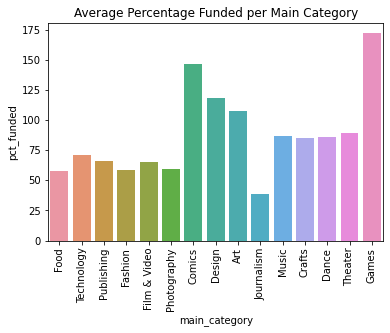

In [286]:
# visualizing Average Percentage Funded per Main Category
plt.title("Average Percentage Funded per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["pct_funded"], ci = None)

In [287]:
## averages of all numeric variables grouped by state (groupby)
df3["length_days"].groupby(df3["state"]).mean()

state
failed        35.165957
successful    32.131519
Name: length_days, dtype: float64

In [288]:
df3["usd pledged"].groupby(df3["state"]).mean()

state
failed         1216.878654
successful    10542.483195
Name: usd pledged, dtype: float64

In [289]:
df3["goal"].groupby(df3["state"]).mean()

#this is an interesting piece of info

state
failed        30662.900419
successful     7830.484319
Name: goal, dtype: float64

<AxesSubplot:xlabel='state', ylabel='goal'>

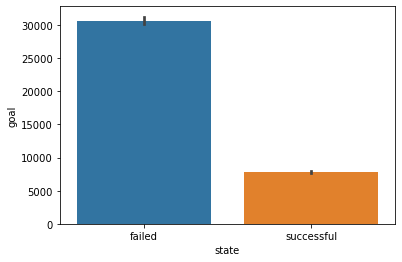

In [291]:
sns.barplot(data = df3, x = "state", y = "goal")

In [292]:
df3["backers"].groupby(df3["state"]).mean()

state
failed         15.873337
successful    136.952364
Name: backers, dtype: float64

In [293]:
df3["pct_funded"].groupby(df3["state"]).mean()

state
failed          8.898846
successful    205.060963
Name: pct_funded, dtype: float64

In [294]:
df3["avg_pledge_per_backer"].groupby(df3["state"]).mean()

state
failed             NaN
successful    84.62903
Name: avg_pledge_per_backer, dtype: float64

In [295]:
df3.describe()

,length_days,goal,usd pledged,backers,pct_funded,avg_pledge_per_backer
count,278002.000000,2.780020e+05,278002.000000,278002.000000,278002.000000,244743.0000
mean,33.967123,2.164235e+04,4901.203939,63.708790,86.397848,inf
std,12.919110,9.573754e+04,13655.332619,143.779266,560.177733,NaN
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,0.0000
25%,30.000000,2.000000e+03,36.000000,2.000000,0.560000,23.7500
50%,30.000000,5.000000e+03,659.000000,14.000000,15.726491,46.4375
75%,36.000000,1.500000e+04,3884.722704,59.000000,107.211650,81.0000
max,92.000000,3.141592e+06,268654.025500,1415.000000,54575.666667,inf


# BINNING

In [296]:
# create bins for number of backers

bins = [0, 5, 15, 30, 60, 100, 1500]
bin_labels = ["0-4", "5-14", "15-29", "30-59", "60-99", "100-1500"]

df3["backers_group"] = pd.cut(df3["backers"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,usd pledged,backers,state,pct_funded,avg_pledge_per_backer,backers_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.000000,46,failed,29.016752,86.608696,30-59
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,1561.784015,31,failed,2.082379,50.380130,30-59
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,4152.402045,46,failed,27.682680,90.269610,30-59
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,19.435528,6,failed,0.097178,3.239255,5-14
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2908.076574,29,failed,14.540383,100.278503,15-29


In [297]:
# create bins for usd pledged

bins = [0, 50, 100, 1000, 2000, 5000, 10000, 100000, 300000]
bin_labels = ["0-49", "50-99", "100-999", "1000-1,999", "2,000-4,999", "5,000-9,999", "10,000-99,999", "100,000-300,000"]

df3["usd_pledged_group"] = pd.cut(df3["usd pledged"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,usd pledged,backers,state,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.000000,46,failed,29.016752,86.608696,30-59,"2,000-4,999"
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,1561.784015,31,failed,2.082379,50.380130,30-59,"1000-1,999"
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,4152.402045,46,failed,27.682680,90.269610,30-59,"2,000-4,999"
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,19.435528,6,failed,0.097178,3.239255,5-14,0-49
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2908.076574,29,failed,14.540383,100.278503,15-29,"2,000-4,999"


In [299]:
# create bins for pct_funded

bins = [0, 1, 15, 90, 100, 110, 55000]
bin_labels = ["0-0.9", "1-14", "15-89", "90-99", "100-109", "110+"]

df3["pct_funded_group"] = pd.cut(df3["pct_funded"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,usd pledged,backers,state,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.000000,46,failed,29.016752,86.608696,30-59,"2,000-4,999",15-89
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,1561.784015,31,failed,2.082379,50.380130,30-59,"1000-1,999",1-14
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,4152.402045,46,failed,27.682680,90.269610,30-59,"2,000-4,999",15-89
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,19.435528,6,failed,0.097178,3.239255,5-14,0-49,0-0.9
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2908.076574,29,failed,14.540383,100.278503,15-29,"2,000-4,999",1-14


# Visuals with Bins

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='main_category', ylabel='usd pledged'>

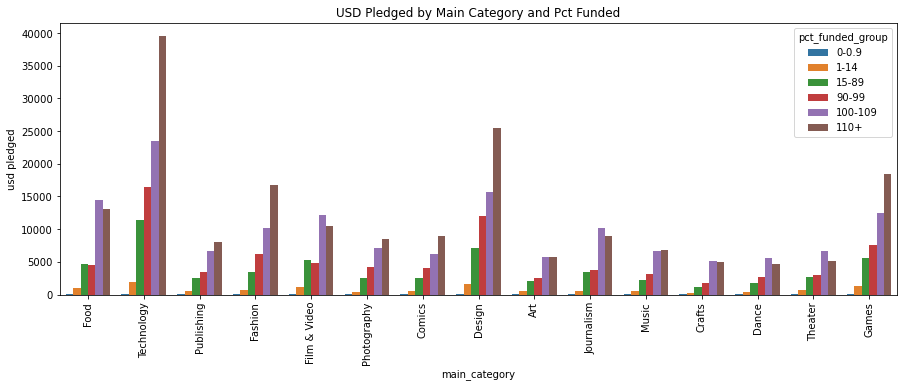

In [300]:
# average number of backers and pledges by main category 
# include the variable "pct_funded" to get a better picture of the projects that met/exceeded their goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["main_category"], y = df3["usd pledged"], hue = df3["pct_funded_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Backers'}, xlabel='main_category', ylabel='usd pledged'>

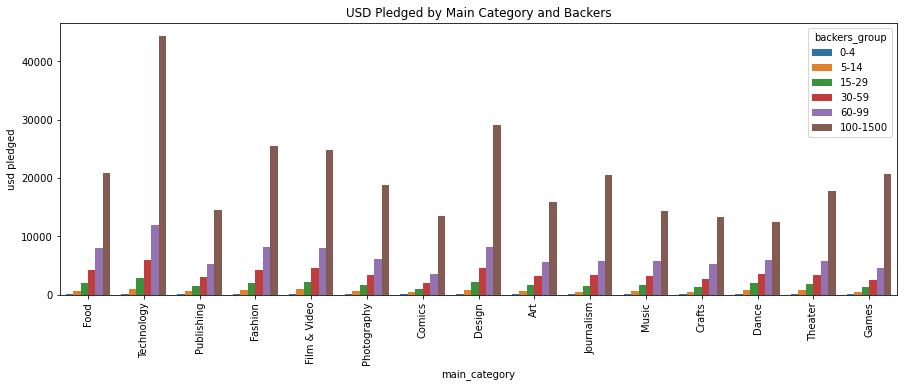

In [301]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Backers")
sns.barplot(x=df3["main_category"], y = df3["usd pledged"], hue = df3["backers_group"], ci=None)

<AxesSubplot:title={'center':'Pct Funded by Main Category and USD Pledged Group'}, xlabel='main_category', ylabel='pct_funded'>

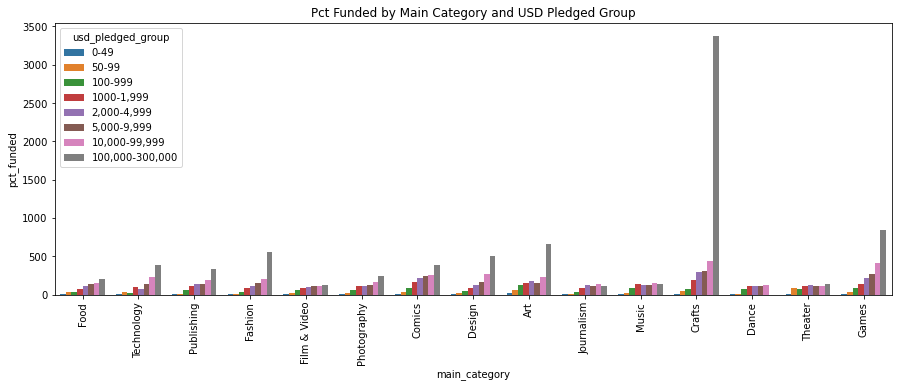

In [302]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Pct Funded by Main Category and USD Pledged Group")
sns.barplot(x=df3["main_category"], y = df3["pct_funded"], hue = df3["usd_pledged_group"], ci=None)

C:\Users\liket\anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:title={'center':'Avg Pledge per Backer by Main Category and USD Pledged Group'}, xlabel='main_category', ylabel='avg_pledge_per_backer'>

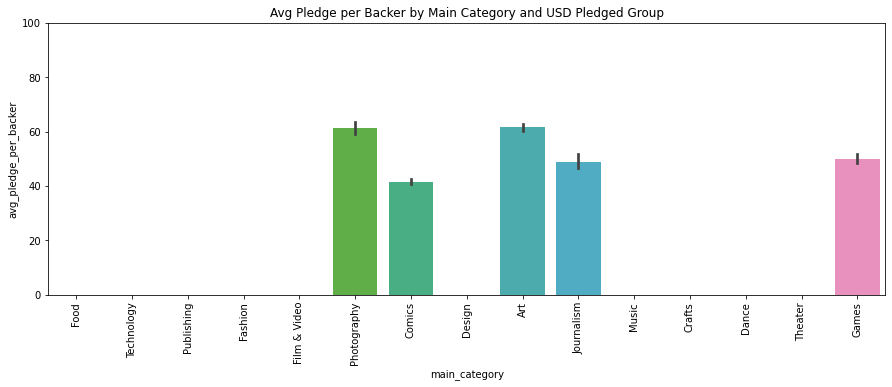

In [304]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Avg Pledge per Backer by Main Category and USD Pledged Group")
sns.barplot(x=df3["main_category"], y = df3["avg_pledge_per_backer"])

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='pct_funded_group', ylabel='usd pledged'>

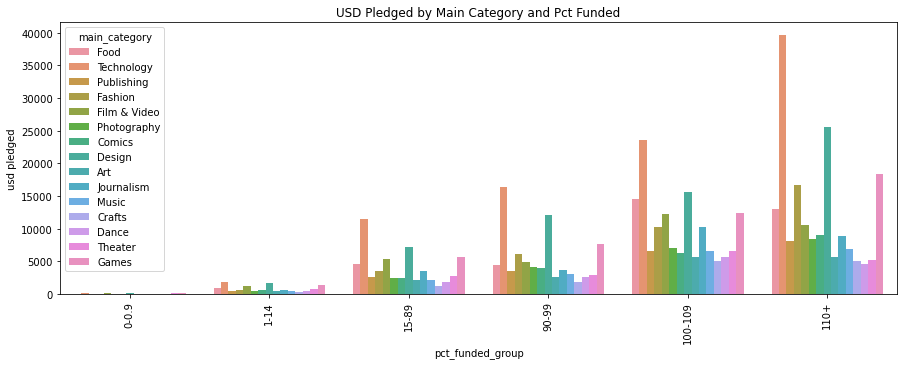

In [305]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["pct_funded_group"], y = df3["usd pledged"], hue = df3["main_category"], ci=None)

<AxesSubplot:title={'center':'Average Goal by Main Category and State'}, xlabel='main_category', ylabel='goal'>

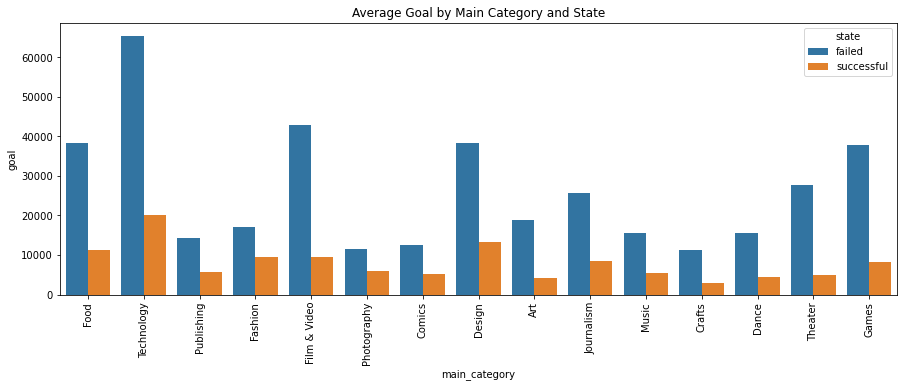

In [306]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average Goal by Main Category and State")
sns.barplot(data = df3, x="main_category", y= "goal", hue = "state", ci = None)

# Creating Datasets of Sub-Groups (Main Categories)

In [307]:
# for sub-group analysis creating a dataset with main category = food only

df3_food = df3.copy()

In [308]:
df3_food["Food Main Category"] = np.where(df3["main_category"]=="Food", "Y", "N")
df3_food.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,usd pledged,backers,state,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,Food Main Category
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.000000,46,failed,29.016752,86.608696,30-59,"2,000-4,999",15-89,Y
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,1561.784015,31,failed,2.082379,50.380130,30-59,"1000-1,999",1-14,N
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,4152.402045,46,failed,27.682680,90.269610,30-59,"2,000-4,999",15-89,N
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,19.435528,6,failed,0.097178,3.239255,5-14,0-49,0-0.9,N
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2908.076574,29,failed,14.540383,100.278503,15-29,"2,000-4,999",1-14,N


In [309]:
df3_food.drop(df3_food.loc[df3_food["Food Main Category"]=="N"].index, inplace = True)

In [310]:
df3_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18827 entries, 0 to 260615
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   18827 non-null  object        
 1   main_category          18827 non-null  object        
 2   category               18827 non-null  object        
 3   country                18827 non-null  object        
 4   currency               18827 non-null  object        
 5   launched               18827 non-null  datetime64[ns]
 6   deadline               18827 non-null  datetime64[ns]
 7   length_days            18827 non-null  int64         
 8   goal                   18827 non-null  float64       
 9   usd pledged            18827 non-null  float64       
 10  backers                18827 non-null  int64         
 11  state                  18827 non-null  object        
 12  pct_funded             18827 non-null  float64       
 13  

In [311]:
# for sub-group analysis creating a dataset with main category = techonology only

df3_tech = df3.copy()
df3_tech["Tech Main Category"] = np.where(df3["main_category"]=="Technology", "Y", "N")
df3_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [312]:
df3_tech.drop(df3_tech.loc[df3_tech["Tech Main Category"]=="N"].index, inplace = True)
df3_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20730 entries, 1 to 273153
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   20730 non-null  object        
 1   main_category          20730 non-null  object        
 2   category               20730 non-null  object        
 3   country                20730 non-null  object        
 4   currency               20730 non-null  object        
 5   launched               20730 non-null  datetime64[ns]
 6   deadline               20730 non-null  datetime64[ns]
 7   length_days            20730 non-null  int64         
 8   goal                   20730 non-null  float64       
 9   usd pledged            20730 non-null  float64       
 10  backers                20730 non-null  int64         
 11  state                  20730 non-null  object        
 12  pct_funded             20730 non-null  float64       
 13  

In [313]:
# for sub-group analysis creating a dataset with main category = publishing only

df3_pub = df3.copy()
df3_pub["Publishing Main Category"] = np.where(df3_pub["main_category"]=="Publishing", "Y", "N")
df3_pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   name                      278002 non-null  object        
 1   main_category             278002 non-null  object        
 2   category                  278002 non-null  object        
 3   country                   278002 non-null  object        
 4   currency                  278002 non-null  object        
 5   launched                  278002 non-null  datetime64[ns]
 6   deadline                  278002 non-null  datetime64[ns]
 7   length_days               278002 non-null  int64         
 8   goal                      278002 non-null  float64       
 9   usd pledged               278002 non-null  float64       
 10  backers                   278002 non-null  int64         
 11  state                     278002 non-null  object        
 12  pc

In [314]:
df3_pub.drop(df3_pub.loc[df3_pub["Publishing Main Category"]=="N"].index, inplace = True)
df3_pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30150 entries, 456 to 281855
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      30150 non-null  object        
 1   main_category             30150 non-null  object        
 2   category                  30150 non-null  object        
 3   country                   30150 non-null  object        
 4   currency                  30150 non-null  object        
 5   launched                  30150 non-null  datetime64[ns]
 6   deadline                  30150 non-null  datetime64[ns]
 7   length_days               30150 non-null  int64         
 8   goal                      30150 non-null  float64       
 9   usd pledged               30150 non-null  float64       
 10  backers                   30150 non-null  int64         
 11  state                     30150 non-null  object        
 12  pct_funded     

In [315]:
# for sub-group analysis creating a dataset with main category = fashion only

df3_fash = df3.copy()
df3_fash["Fashion Main Category"] = np.where(df3_fash["main_category"]=="Fashion", "Y", "N")
df3_fash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [316]:
df3_fash.drop(df3_fash.loc[df3_fash["Fashion Main Category"]=="N"].index, inplace = True)
df3_fash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15728 entries, 1046 to 212623
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   15728 non-null  object        
 1   main_category          15728 non-null  object        
 2   category               15728 non-null  object        
 3   country                15728 non-null  object        
 4   currency               15728 non-null  object        
 5   launched               15728 non-null  datetime64[ns]
 6   deadline               15728 non-null  datetime64[ns]
 7   length_days            15728 non-null  int64         
 8   goal                   15728 non-null  float64       
 9   usd pledged            15728 non-null  float64       
 10  backers                15728 non-null  int64         
 11  state                  15728 non-null  object        
 12  pct_funded             15728 non-null  float64       
 1

In [317]:
# for sub-group analysis creating a dataset with main category = film & video only

df3_film = df3.copy()
df3_film["Film & Video Main Category"] = np.where(df3_film["main_category"]=="Film & Video", "Y", "N")
df3_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   name                        278002 non-null  object        
 1   main_category               278002 non-null  object        
 2   category                    278002 non-null  object        
 3   country                     278002 non-null  object        
 4   currency                    278002 non-null  object        
 5   launched                    278002 non-null  datetime64[ns]
 6   deadline                    278002 non-null  datetime64[ns]
 7   length_days                 278002 non-null  int64         
 8   goal                        278002 non-null  float64       
 9   usd pledged                 278002 non-null  float64       
 10  backers                     278002 non-null  int64         
 11  state                       278002 non-

In [318]:
df3_film.drop(df3_film.loc[df3_film["Film & Video Main Category"]=="N"].index, inplace = True)
df3_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50747 entries, 2784 to 278356
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        50747 non-null  object        
 1   main_category               50747 non-null  object        
 2   category                    50747 non-null  object        
 3   country                     50747 non-null  object        
 4   currency                    50747 non-null  object        
 5   launched                    50747 non-null  datetime64[ns]
 6   deadline                    50747 non-null  datetime64[ns]
 7   length_days                 50747 non-null  int64         
 8   goal                        50747 non-null  float64       
 9   usd pledged                 50747 non-null  float64       
 10  backers                     50747 non-null  int64         
 11  state                       50747 non-null  object

In [319]:
# for sub-group analysis creating a dataset with main category = photography only

df3_photo = df3.copy()
df3_photo["Photography Main Category"] = np.where(df3_photo["main_category"]=="Photography", "Y", "N")
df3_photo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   name                       278002 non-null  object        
 1   main_category              278002 non-null  object        
 2   category                   278002 non-null  object        
 3   country                    278002 non-null  object        
 4   currency                   278002 non-null  object        
 5   launched                   278002 non-null  datetime64[ns]
 6   deadline                   278002 non-null  datetime64[ns]
 7   length_days                278002 non-null  int64         
 8   goal                       278002 non-null  float64       
 9   usd pledged                278002 non-null  float64       
 10  backers                    278002 non-null  int64         
 11  state                      278002 non-null  object  

In [320]:
df3_photo.drop(df3_photo.loc[df3_photo["Photography Main Category"]=="N"].index, inplace = True)
df3_photo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8656 entries, 3279 to 182183
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       8656 non-null   object        
 1   main_category              8656 non-null   object        
 2   category                   8656 non-null   object        
 3   country                    8656 non-null   object        
 4   currency                   8656 non-null   object        
 5   launched                   8656 non-null   datetime64[ns]
 6   deadline                   8656 non-null   datetime64[ns]
 7   length_days                8656 non-null   int64         
 8   goal                       8656 non-null   float64       
 9   usd pledged                8656 non-null   float64       
 10  backers                    8656 non-null   int64         
 11  state                      8656 non-null   object        
 12  p

In [321]:
# for sub-group analysis creating a dataset with main category = comics only

df3_comics = df3.copy()
df3_comics["Comics Main Category"] = np.where(df3_comics["main_category"]=="Comics", "Y", "N")
df3_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [322]:
df3_comics.drop(df3_comics.loc[df3_comics["Comics Main Category"]=="N"].index, inplace = True)
df3_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7774 entries, 5443 to 273584
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   7774 non-null   object        
 1   main_category          7774 non-null   object        
 2   category               7774 non-null   object        
 3   country                7774 non-null   object        
 4   currency               7774 non-null   object        
 5   launched               7774 non-null   datetime64[ns]
 6   deadline               7774 non-null   datetime64[ns]
 7   length_days            7774 non-null   int64         
 8   goal                   7774 non-null   float64       
 9   usd pledged            7774 non-null   float64       
 10  backers                7774 non-null   int64         
 11  state                  7774 non-null   object        
 12  pct_funded             7774 non-null   float64       
 13

In [323]:
# for sub-group analysis creating a dataset with main category = design only

df3_design = df3.copy()
df3_design["Design Main Category"] = np.where(df3_design["main_category"]=="Design", "Y", "N")
df3_design.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [324]:
df3_design.drop(df3_design.loc[df3_design["Design Main Category"]=="N"].index, inplace = True)
df3_design.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19244 entries, 14594 to 260245
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   19244 non-null  object        
 1   main_category          19244 non-null  object        
 2   category               19244 non-null  object        
 3   country                19244 non-null  object        
 4   currency               19244 non-null  object        
 5   launched               19244 non-null  datetime64[ns]
 6   deadline               19244 non-null  datetime64[ns]
 7   length_days            19244 non-null  int64         
 8   goal                   19244 non-null  float64       
 9   usd pledged            19244 non-null  float64       
 10  backers                19244 non-null  int64         
 11  state                  19244 non-null  object        
 12  pct_funded             19244 non-null  float64       
 

In [325]:
# for sub-group analysis creating a dataset with main category = art only

df3_art = df3.copy()
df3_art["Art Main Category"] = np.where(df3_art["main_category"]=="Art", "Y", "N")
df3_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [326]:
df3_art.drop(df3_art.loc[df3_art["Art Main Category"]=="N"].index, inplace = True)
df3_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21751 entries, 15125 to 261057
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   21751 non-null  object        
 1   main_category          21751 non-null  object        
 2   category               21751 non-null  object        
 3   country                21751 non-null  object        
 4   currency               21751 non-null  object        
 5   launched               21751 non-null  datetime64[ns]
 6   deadline               21751 non-null  datetime64[ns]
 7   length_days            21751 non-null  int64         
 8   goal                   21751 non-null  float64       
 9   usd pledged            21751 non-null  float64       
 10  backers                21751 non-null  int64         
 11  state                  21751 non-null  object        
 12  pct_funded             21751 non-null  float64       
 

In [327]:
# for sub-group analysis creating a dataset with main category = journalism only

df3_journ = df3.copy()
df3_journ["Journalism Main Category"] = np.where(df3_journ["main_category"]=="Journalism", "Y", "N")
df3_journ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   name                      278002 non-null  object        
 1   main_category             278002 non-null  object        
 2   category                  278002 non-null  object        
 3   country                   278002 non-null  object        
 4   currency                  278002 non-null  object        
 5   launched                  278002 non-null  datetime64[ns]
 6   deadline                  278002 non-null  datetime64[ns]
 7   length_days               278002 non-null  int64         
 8   goal                      278002 non-null  float64       
 9   usd pledged               278002 non-null  float64       
 10  backers                   278002 non-null  int64         
 11  state                     278002 non-null  object        
 12  pc

In [328]:
df3_journ.drop(df3_journ.loc[df3_journ["Journalism Main Category"]=="N"].index, inplace = True)
df3_journ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 23416 to 273155
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      3519 non-null   object        
 1   main_category             3519 non-null   object        
 2   category                  3519 non-null   object        
 3   country                   3519 non-null   object        
 4   currency                  3519 non-null   object        
 5   launched                  3519 non-null   datetime64[ns]
 6   deadline                  3519 non-null   datetime64[ns]
 7   length_days               3519 non-null   int64         
 8   goal                      3519 non-null   float64       
 9   usd pledged               3519 non-null   float64       
 10  backers                   3519 non-null   int64         
 11  state                     3519 non-null   object        
 12  pct_funded    

In [329]:
# for sub-group analysis creating a dataset with main category = music only

df3_music = df3.copy()
df3_music["Music Main Category"] = np.where(df3_music["main_category"]=="Music", "Y", "N")
df3_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [330]:
df3_music.drop(df3_music.loc[df3_music["Music Main Category"]=="N"].index, inplace = True)
df3_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40763 entries, 23856 to 281029
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   40763 non-null  object        
 1   main_category          40763 non-null  object        
 2   category               40763 non-null  object        
 3   country                40763 non-null  object        
 4   currency               40763 non-null  object        
 5   launched               40763 non-null  datetime64[ns]
 6   deadline               40763 non-null  datetime64[ns]
 7   length_days            40763 non-null  int64         
 8   goal                   40763 non-null  float64       
 9   usd pledged            40763 non-null  float64       
 10  backers                40763 non-null  int64         
 11  state                  40763 non-null  object        
 12  pct_funded             40763 non-null  float64       
 

In [331]:
# for sub-group analysis creating a dataset with main category = crafts only

df3_crafts = df3.copy()
df3_crafts["Crafts Main Category"] = np.where(df3_crafts["main_category"]=="Crafts", "Y", "N")
df3_crafts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [332]:
df3_crafts.drop(df3_crafts.loc[df3_crafts["Crafts Main Category"]=="N"].index, inplace = True)
df3_crafts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6303 entries, 24505 to 279198
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   6303 non-null   object        
 1   main_category          6303 non-null   object        
 2   category               6303 non-null   object        
 3   country                6303 non-null   object        
 4   currency               6303 non-null   object        
 5   launched               6303 non-null   datetime64[ns]
 6   deadline               6303 non-null   datetime64[ns]
 7   length_days            6303 non-null   int64         
 8   goal                   6303 non-null   float64       
 9   usd pledged            6303 non-null   float64       
 10  backers                6303 non-null   int64         
 11  state                  6303 non-null   object        
 12  pct_funded             6303 non-null   float64       
 1

In [333]:
# for sub-group analysis creating a dataset with main category = dance only

df3_dance = df3.copy()
df3_dance["Dance Main Category"] = np.where(df3_dance["main_category"]=="Dance", "Y", "N")
df3_dance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [334]:
df3_dance.drop(df3_dance.loc[df3_dance["Dance Main Category"]=="N"].index, inplace = True)
df3_dance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 49379 to 279317
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   3194 non-null   object        
 1   main_category          3194 non-null   object        
 2   category               3194 non-null   object        
 3   country                3194 non-null   object        
 4   currency               3194 non-null   object        
 5   launched               3194 non-null   datetime64[ns]
 6   deadline               3194 non-null   datetime64[ns]
 7   length_days            3194 non-null   int64         
 8   goal                   3194 non-null   float64       
 9   usd pledged            3194 non-null   float64       
 10  backers                3194 non-null   int64         
 11  state                  3194 non-null   object        
 12  pct_funded             3194 non-null   float64       
 1

In [335]:
# for sub-group analysis creating a dataset with main category = theater only

df3_thea = df3.copy()
df3_thea["Theater Main Category"] = np.where(df3_thea["main_category"]=="Theater", "Y", "N")
df3_thea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [336]:
df3_thea.drop(df3_thea.loc[df3_thea["Theater Main Category"]=="N"].index, inplace = True)
df3_thea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9323 entries, 75588 to 259564
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   9323 non-null   object        
 1   main_category          9323 non-null   object        
 2   category               9323 non-null   object        
 3   country                9323 non-null   object        
 4   currency               9323 non-null   object        
 5   launched               9323 non-null   datetime64[ns]
 6   deadline               9323 non-null   datetime64[ns]
 7   length_days            9323 non-null   int64         
 8   goal                   9323 non-null   float64       
 9   usd pledged            9323 non-null   float64       
 10  backers                9323 non-null   int64         
 11  state                  9323 non-null   object        
 12  pct_funded             9323 non-null   float64       
 1

In [337]:
# for sub-group analysis creating a dataset with main category = games only

df3_games = df3.copy()
df3_games["Games Main Category"] = np.where(df3_games["main_category"]=="Games", "Y", "N")
df3_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278002 entries, 0 to 281855
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   278002 non-null  object        
 1   main_category          278002 non-null  object        
 2   category               278002 non-null  object        
 3   country                278002 non-null  object        
 4   currency               278002 non-null  object        
 5   launched               278002 non-null  datetime64[ns]
 6   deadline               278002 non-null  datetime64[ns]
 7   length_days            278002 non-null  int64         
 8   goal                   278002 non-null  float64       
 9   usd pledged            278002 non-null  float64       
 10  backers                278002 non-null  int64         
 11  state                  278002 non-null  object        
 12  pct_funded             278002 non-null  floa

In [338]:
df3_games.drop(df3_games.loc[df3_games["Games Main Category"]=="N"].index, inplace = True)
df3_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21293 entries, 115589 to 268928
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   21293 non-null  object        
 1   main_category          21293 non-null  object        
 2   category               21293 non-null  object        
 3   country                21293 non-null  object        
 4   currency               21293 non-null  object        
 5   launched               21293 non-null  datetime64[ns]
 6   deadline               21293 non-null  datetime64[ns]
 7   length_days            21293 non-null  int64         
 8   goal                   21293 non-null  float64       
 9   usd pledged            21293 non-null  float64       
 10  backers                21293 non-null  int64         
 11  state                  21293 non-null  object        
 12  pct_funded             21293 non-null  float64       


# More Visuals for a Deeper Look

Text(0.5, 1.0, 'Goal vs. Length_Days per State')

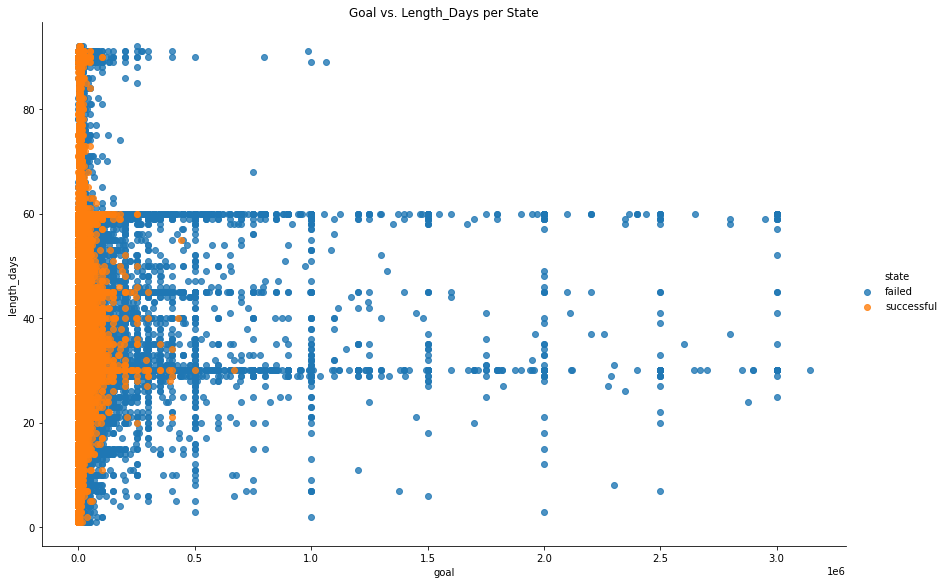

In [347]:
sns.lmplot(data = df3, x = 'goal', y = 'length_days', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Length_Days per State")

#looks like length doesn't matter as much as goal

Text(0.5, 1.0, 'Goal vs. Avg Pledge per Backer')

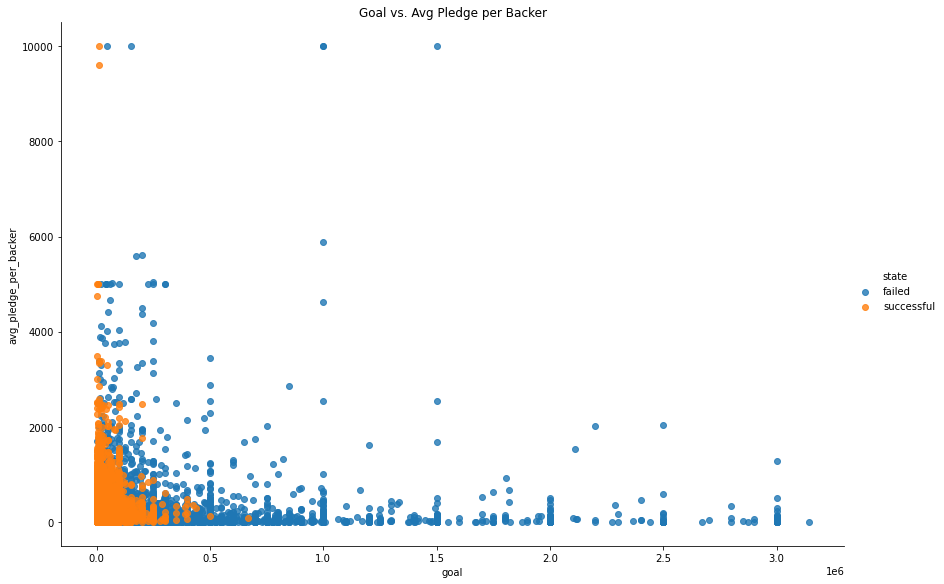

In [351]:
sns.lmplot(data = df3, x = 'goal', y = 'avg_pledge_per_backer', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Avg Pledge per Backer")

# reaffirms that lower goal is more successful, directly correlates with average pledge per backer

Text(0.5, 1.0, 'Goal vs. Avg Pledge per Backer')

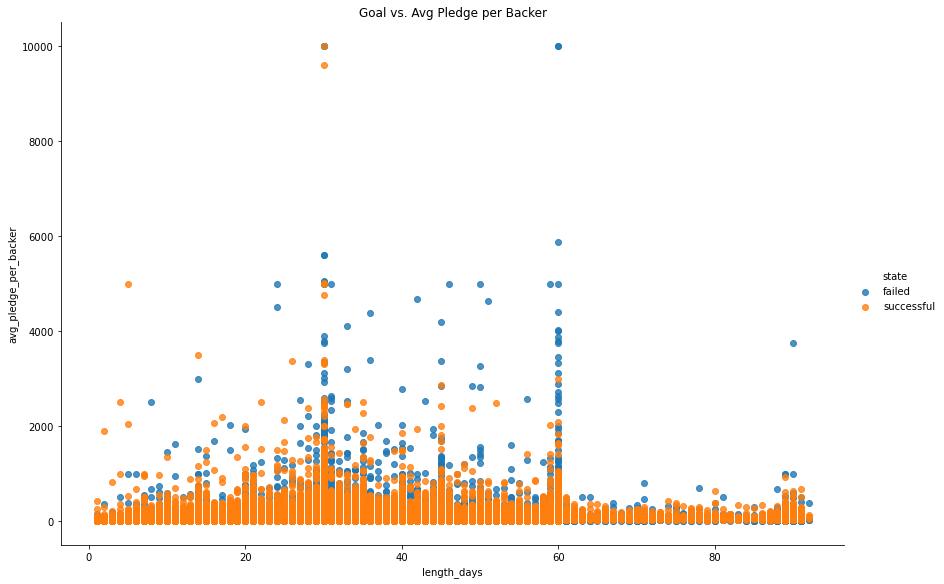

In [353]:
sns.lmplot(data = df3, x = 'length_days', y = 'avg_pledge_per_backer', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal vs. Avg Pledge per Backer")

#interesting!  no apparent correlation between the two variables.  successful projects have lower goals

In [ ]:
# average number of backers and pledges by main category and subcategory 


In [174]:
## state by campaign main category (crosstab)

pd.crosstab(df3["main_category"], df3["state"])

#success rates PER MAIN CATEGORY:
#art: 44%
#comics: 57% 
#crafts: 26%
#dance: 66%
#design: 39%
#fashion: 27%
#film&video: 42%
#food: 28%
#games: 41%
#journalism: 25%
#music: 53%
#photography: 34%
#publishing: 34%
#technology: 22%
#theater: 64%

# Film & Video, Music comopose greatest % of overall success (across all main categories) on Kickstarter, as a result of having the most projects

state,failed,successful
main_category,,
Art,12128,9665
Comics,3411,4471
Crafts,4637,1671
Dance,1091,2104
Design,12060,7730
Fashion,11520,4284
Film & Video,29696,21350
Food,13632,5250
Games,13028,9110


In [175]:
## state by campaign sub-category (crosstab)
pd.crosstab(df3_art["category"], df3["state"])


state,failed,successful
category,,
Art,3452,2785
Ceramics,109,92
Conceptual Art,496,330
Digital Art,671,306
Illustration,992,1110
Installations,156,194
Mixed Media,1369,816
Painting,1648,993
Performance Art,971,874


In [179]:
for col in df3_art:
    print(df3_art[col].unique())

['TheNameCloud' 'Sokovikova-Art'
 'REEFCALENDAR - The Project for our Reefs!' ... 'Short Film Funding!'
 'deforme.' 'Children at Work - What are their stories?']
['Art']
['Art' 'Ceramics' 'Conceptual Art' 'Digital Art' 'Illustration'
 'Installations' 'Mixed Media' 'Painting' 'Performance Art' 'Public Art'
 'Sculpture' 'Textiles' 'Video Art']
['AT' 'AU' 'BE' 'CA' 'CH' 'DE' 'DK' 'ES' 'FR' 'GB' 'HK' 'IE' 'IT' 'MX'
 'NL' 'NO' 'NZ' 'SE' 'US' 'SG' 'LU']
['EUR' 'AUD' 'CAD' 'CHF' 'DKK' 'GBP' 'HKD' 'MXN' 'NOK' 'NZD' 'SEK' 'USD'
 'SGD']
['2015-11-14T23:52:09.000000000' '2016-01-04T18:38:25.000000000'
 '2016-09-13T22:05:56.000000000' ... '2015-05-02T00:14:08.000000000'
 '2016-10-10T02:31:55.000000000' '2015-02-18T17:35:06.000000000']
['2015-12-29T23:52:09.000000000' '2016-02-29T23:59:00.000000000'
 '2016-11-01T11:30:00.000000000' ... '2015-04-24T08:44:58.000000000'
 '2015-06-01T00:14:08.000000000' '2015-03-20T16:35:06.000000000']
[45 56 48 30 60 32 14 28 29 11  8 40 59 10 43 33 15 26 31 20 38 42 

In [184]:
#arts = {"Sub-Category":['Art', 'Ceramics', 'Conceptual Art', 'Digital Art', 'Illustration',
 #'Installations', 'Mixed Media', 'Painting', 'Performance Art', 'Public Art',
 #'Sculpture', 'Textiles', 'Video Art'], 
            # "Success":[
(df.loc[df3_art["category"]=="Art" and df3_art["state"]=='successful'].index).sum()
             #"Fail":["Columbia", "Scotland", "USA", "Canada", "South Africa"], 


#df = pd.DataFrame(passenger)

#df

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## <font color=#306EFF>Part 5: Group Presentation</font>

By now, your group should feel very comfortable with the aspects of the Kickstarter dataset. You should have a firm understanding of what Kickstarter is, what the dataset contains, the characteristics of each variable, how the variables interact with each other, and finally, which variables influence the outcome of the Kickstarter campaign. Can you put all this information together to tell a story about the data? Your presentation should include visualizations and clear answers to the two primary questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

In addition to these two questions, your presentation should cover the additional questions listed below. These questions should be easy to answer using the information you discovered above. When you are done, submit your completed notebook to me.   

### <font color=#306EFF>Questions to Answer</font>
1.	What main category is the most profitable (highest amount of money pledged)? 
2.	Which main category is the most popular (highest number of backers)?
3.	Which sub-categories are the most profitable and popular (top 3)?
4.	What are some of the characteristics of a successful Kickstarter campaign? 
5.	How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 

***

### <font color=#306EFF>TIPS FOR A GREAT PRESENTATION</font>

* Start with the most important information (answers to the two questions above), and work backwards. The entire class will be working with the same dataset, therefore, we don't need to know the details of all your coding -- we just want to know what findings are most important to the questions. 
* Create clear visualizations. Make sure your audience can quickly and easily understand what your visualizations are showing. While you have a lot of options for how to style your visualizations, don't go overboard! 
* Make sure everyone understands what the visualization is showing; it should not have to stand on its own. When you present a visualization, you should be able to discuss what it means and what the significance is. 
* Use a single presentation format -- you can create a PowerPoint presentation or organize your notebook in a way that is easy to follow; reguardless of what your group puts together, you should use only ONE format. 